In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylcp.fields as fields
from scipy.spatial.transform import Rotation

In [2]:
test_field = fields.magField(lambda R: np.array([-0.5*R[0], -0.5*R[1], 1*R[2]]))

print(test_field.Field())
print(test_field.gradField(np.array([5., 2., 1.])))

[-0. -0.  0.]
[[-0.5  0.   0. ]
 [ 0.  -0.5  0. ]
 [ 0.   0.   1. ]]


In [3]:
example_beams = fields.laserBeams([
    {'kvec':np.array([0., 0., 1.]), 'pol':np.array([0., 0., 1.]),
     'pol_coord':'spherical', 'delta':-2, 's': 1.},
    {'kvec':np.array([0., 0., -1.]), 'pol':np.array([0., 0., 1.]),
     'pol_coord':'spherical', 'delta':-2, 's': 1.},
    ])

print(example_beams.beam_vector[0].jones_vector(np.array([1., 0., 0.]), np.array([0., 1., 0.])))

print(example_beams.kvec())
print(example_beams.pol())
print(example_beams.intensity())
print(example_beams.electric_field_gradient(np.array([0., 0., 0.]), 0.5))

[-0.70710678+0.j          0.        +0.70710678j]
[[ 0.  0.  1.]
 [ 0.  0. -1.]]
[[0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j]]
[1. 1.]
[[[ 0.        +0.j          0.        +0.j
    0.        +0.j        ]
  [ 0.        +0.j          0.        +0.j
    0.        +0.j        ]
  [ 0.        +0.j          0.        +0.j
   -1.19001968-0.76410285j]]

 [[ 0.        +0.j          0.        +0.j
    0.        +0.j        ]
  [ 0.        +0.j          0.        +0.j
    0.        +0.j        ]
  [ 0.        +0.j          0.        +0.j
    1.19001968+0.76410285j]]]


In [4]:
example_beams_2 = fields.laserBeams([
    {'kvec':np.array([0., 0., 1.]), 'pol':np.array([0., 0., 1.]),
     'pol_coord':'spherical', 'delta':-2, 's': lambda R: 1.},
    {'kvec':np.array([0., 0., -1.]), 'pol':np.array([0., 0., 1.]),
     'pol_coord':'spherical', 'delta':-2, 's': lambda R: 1.},
    ])

print(example_beams_2.electric_field_gradient(np.array([0., 0., 0.]), 0.5))

[[[ 0.        +0.j          0.        +0.j
    0.        +0.j        ]
  [ 0.        +0.j          0.        +0.j
    0.        +0.j        ]
  [ 0.        +0.j          0.        +0.j
   -1.19001968-0.76410285j]]

 [[ 0.        +0.j          0.        +0.j
    0.        +0.j        ]
  [ 0.        +0.j          0.        +0.j
    0.        +0.j        ]
  [ 0.        +0.j          0.        +0.j
    1.19001968+0.76410285j]]]


In [5]:
# test implementations of rho squared for gaussian Beams.
rvals = np.random.rand(3)
mat = np.random.rand(3,100,100)
Rtest = np.array([mat, mat, mat])
%timeit sum((rvals[jj]*Rtest[jj])**2 for jj in range(len(Rtest)))
%timeit np.einsum('i,i...->...',rvals**2, Rtest**2)

126 μs ± 3.79 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
88.1 μs ± 2.51 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


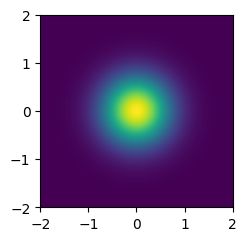

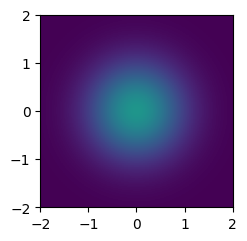

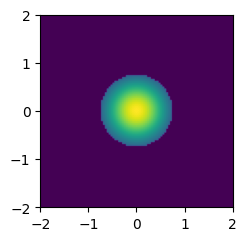

In [6]:
example_beam = fields.gaussianBeam(kvec=np.array([0., 0., 1.]), pol=+1, s=5, delta=-2, wb=1)

X, Y = np.meshgrid(np.linspace(-2, 2, 101),
                   np.linspace(-2, 2, 101))
Rt=np.array([X, Y, np.zeros(X.shape)])
tt=np.zeros(X.shape)

plt.figure("Gaussian Beam", figsize=(3.25, 2.5))
plt.clf()
plt.imshow(example_beam.intensity(R=Rt,t=tt),
           origin='lower',
           extent=(-2, 2,
                   -2, 2))
plt.clim((0, 5))
plt.set_cmap('viridis')

example_beam = fields.focusedGaussianBeam(kvec=np.array([0., 0., 1.]),
                                          pol=np.array([-1/np.sqrt(2), 1j/np.sqrt(2), 0]),
                                          pol_coord='cartesian',
                                          s=5, delta=-2, wb=1, z0=1.5, lmbda=2)

plt.figure("focused Gaussian Beam", figsize=(3.25, 2.5))
plt.clf()
plt.imshow(example_beam.intensity(R=Rt,t=tt),
           origin='lower',
           extent=(-2, 2,
                   -2, 2))
plt.clim((0, 5))
plt.set_cmap('viridis')

example_beam = fields.clippedGaussianBeam(kvec=np.array([0., 0., 1.]),
                                          pol=np.array([-1/np.sqrt(2), 1j/np.sqrt(2), 0]),
                                          pol_coord='cartesian',
                                          s=5, delta=-2, wb=1, rs=0.75)

plt.figure("clipped Gaussian Beam", figsize=(3.25, 2.5))
plt.clf()
plt.imshow(example_beam.intensity(R=Rt,t=tt),
           origin='lower',
           extent=(-2, 2,
                   -2, 2))
plt.clim((0, 5))
plt.set_cmap('viridis')

[[0.-1.58113883j 0.-2.23606798j 0.-1.58113883j]
 [0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j        ]]
(3, 3, 101)


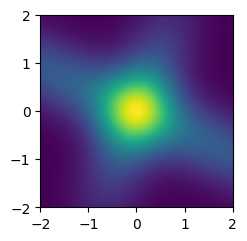

In [7]:
example_beam = fields.infinitePlaneWaveBeam(np.array([1., 0., 0.]), +1, 5, -2)
print(example_beam.electric_field_gradient(np.array([0., 0., 0.]), 0.))

R = np.random.rand(3, 101)
t = np.linspace(0, 10, 101)
print(example_beam.electric_field_gradient(R, t).shape)

MOT_beams = fields.conventional3DMOTBeams(delta=-2, s=1, beam_type=fields.gaussianBeam, wb=1,
                                          rotation_angles=[np.pi/4, np.pi/8, np.pi/8])
MOT_beams.beam_vector[1].kvec()

X, Y = np.meshgrid(np.linspace(-2, 2, 101),
                   np.linspace(-2, 2, 101))
Rt=np.array([X, Y, np.zeros(X.shape)])
tt=np.zeros(X.shape)
plt.figure("3D-MOT Beams", figsize=(3.25, 2.5))
plt.clf()
plt.imshow(np.sum(MOT_beams.intensity(R=Rt,t=tt),axis=0),
           origin='lower',
           extent=(-2, 2,
                   -2, 2))
plt.clim((0, 6))
plt.set_cmap('viridis')